1.9964375873039457


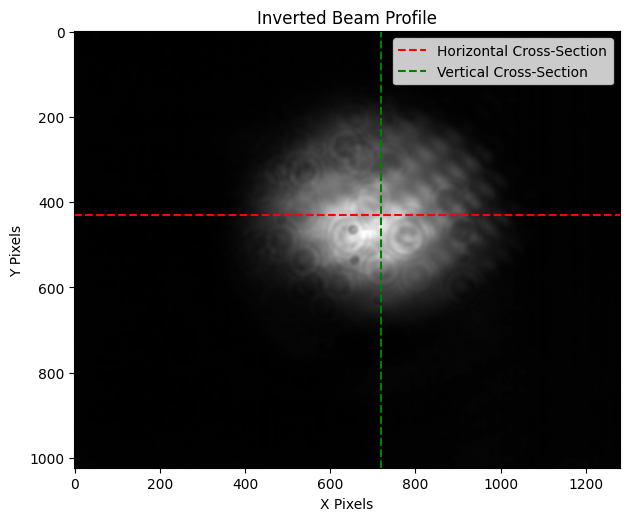

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.ndimage import gaussian_filter
import scipy

cx, cy = 720, 430

#  'Gaussian/Divergence/0inch.bmp'
#  'Gaussian/M2 Polarized States/2.bmp'
#   'Width/0.bmp'

# Load the grayscale image
image = imread('Gaussian/Divergence/20inch.bmp')

inverted_image = 255 - image



if cx == 0 and cy == 0:  # incase I want to maually set cross section
    # Find the maximum point of the beam
    cy, cx = np.unravel_index(np.argmax(inverted_image), inverted_image.shape)

noise_std = np.std(inverted_image[0:50, 0:50])  # top left tiny rectangle
print(noise_std)

# Apply a Gaussian filter to smooth the image and reduce noise
inverted_image = gaussian_filter(inverted_image, sigma=2*noise_std)  # Adjust sigma as needed


# Extract horizontal and vertical cross-sections through the beam center
cross_section_x = inverted_image[cy, :]  # Horizontal slice at y = cy
cross_section_y = inverted_image[:, cx]  # Vertical slice at x = cx

# Plot the original and inverted images with cross-section lines
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(inverted_image, cmap='gray')
plt.title('Inverted Beam Profile')

# Draw horizontal and vertical lines
plt.axhline(y=cy, color='r', linestyle='--', label='Horizontal Cross-Section')
plt.axvline(x=cx, color='g', linestyle='--', label='Vertical Cross-Section')
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.legend()


plt.tight_layout()
# plt.savefig("Gaussian1.png")
plt.show()


In [6]:
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, I0, x0, w, background):
    return I0 * np.exp(-2 * (x - x0)**2 / w**2) + background

def gaussian_fitting(y, center_guess=800):
    # Fit a Gaussian to the horizontal cross-section

    x = np.arange(len(y))

    popt, pcov = curve_fit(gaussian, x, y, p0=[np.max(y), center_guess, 50, 2], sigma=noise_std)

    uncertainty = np.sqrt(np.diag(pcov))
    dof = len(x) - len(popt)

    chisq = np.sum(((y-gaussian(x,*popt))/noise_std)**2) / dof
    cdf = scipy.special.chdtrc(dof,chisq)

    residuals = y - gaussian(x, *popt)

    # Create figure with two subplots: main plot and residuals plot
    fig, ax = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Main plot with data and fit
    ax[0].plot(x, y, 'b-', label='Data')
    ax[0].plot(x, gaussian(x, *popt), 'r--', label='Gaussian Fit')
    ax[0].set_xlabel('Position (pixels)')
    ax[0].set_ylabel('Intensity (0-255 bitmap)')
    ax[0].legend()

    fit_info_text = (
    f"$\chi^2 = {chisq:.2f}$\n"
    f"Intensity = {popt[0]:.2f} ± {uncertainty[0]:.2f}\n"
    f"Mean = {popt[1]:.2f} ± {uncertainty[1]:.2f} px\n"
    f"Sigma = {popt[2]:.2f} ± {uncertainty[2]:.2f} px\n"
    f"Background = {popt[3]:.2f} ± {uncertainty[3]:.2f}")

    # Annotate on the plot
    ax[0].text(0.05, 0.95, fit_info_text, 
            transform=ax[0].transAxes, verticalalignment='top')


    # Residuals plot
    ax[1].plot(x, residuals, 'b-', label='Residuals')
    ax[1].axhline(0, color='gray', linestyle='--')  # Horizontal line at 0
    ax[1].set_xlabel('Position (pixels)')
    ax[1].set_ylabel('Residuals')

    # Show the plot
    plt.tight_layout()
    # plt.savefig("Gaussian3.png")
    plt.show()

    print(f"Fitted parameters:\n I0={popt[0]} +- {uncertainty[0]} \n x0={popt[1]} +- {uncertainty[1]}")
    print(f" w={popt[2]} +- {uncertainty[0]} \n bg={popt[3]} +- {uncertainty[3]}")

<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_81961/3539628168.py:33: SyntaxWarning: invalid escape sequence '\c'
  f"$\chi^2 = {chisq:.2f}$\n"


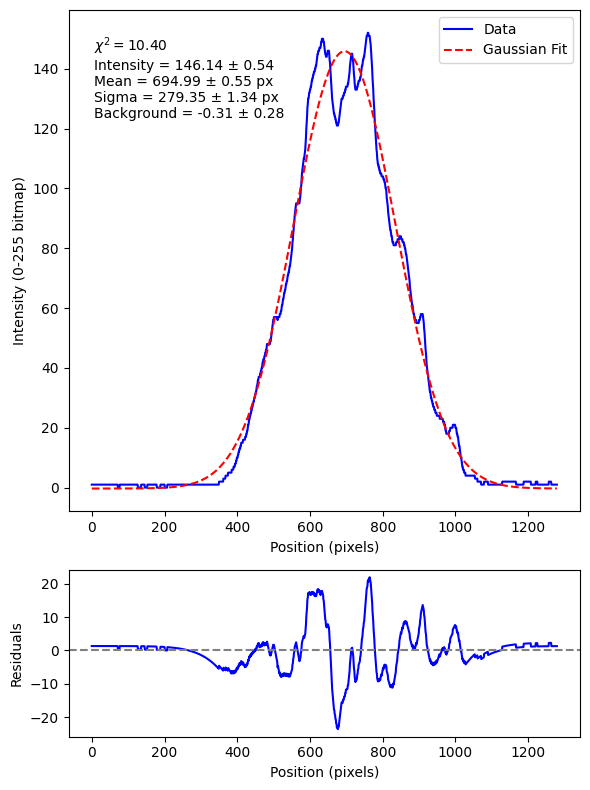

Fitted parameters:
 I0=146.13688230087206 +- 0.5381747744637811 
 x0=694.9870646396262 +- 0.5529721628206699
 w=279.3464202899745 +- 0.5381747744637811 
 bg=-0.3102073303645785 +- 0.2776199219400489


In [7]:
gaussian_fitting(cross_section_x, center_guess=800)

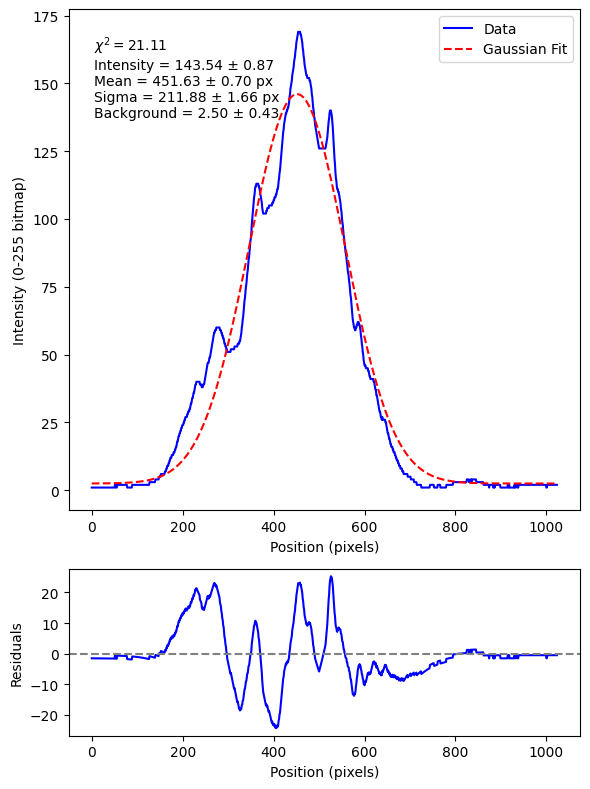

Fitted parameters:
 I0=143.54379588702088 +- 0.8737872875604425 
 x0=451.63060226314104 +- 0.6986781288652787
 w=211.8812018991911 +- 0.8737872875604425 
 bg=2.4978422650072942 +- 0.427300121341052


In [8]:
gaussian_fitting(cross_section_y, center_guess=500)